In [ ]:
import pandas as pd
import logging
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv("train.csv", low_memory=False)
test = pd.read_csv("test.csv", low_memory=False)

In [3]:
train.head()

,id,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,...,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00
0,p01_0,p01,06:10:00,NaN,NaN,9.6,NaN,NaN,9.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4
1,p01_1,p01,06:25:00,NaN,NaN,9.7,NaN,NaN,9.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8
2,p01_2,p01,06:40:00,NaN,NaN,9.2,NaN,NaN,8.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5
3,p01_3,p01,06:55:00,NaN,NaN,8.7,NaN,NaN,8.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8
4,p01_4,p01,07:10:00,NaN,NaN,8.4,NaN,NaN,8.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177024 entries, 0 to 177023
Columns: 508 entries, id to bg+1:00
dtypes: float64(433), object(75)
memory usage: 686.1+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3644 entries, 0 to 3643
Columns: 507 entries, id to activity-0:00
dtypes: float64(432), object(75)
memory usage: 14.1+ MB


In [ ]:

mapping_dict = {p: idx for idx, p in enumerate(train['p_num'].unique())}

train['p_num'] = train['p_num'].map(mapping_dict)
train['time'] = pd.to_datetime(train['time'], format='%H:%M:%S').dt.time
#train['hour'] = train['time'].dt.hour
#train['minute'] = train['time'].dt.minute
#train.drop('time', axis=1, inplace=True)

# Drop the 'id' column if it exists
if 'id' in train.columns:
    train.drop(columns=['id'], inplace=True)

train.head()


,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,...,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00
0,0,06:10:00,NaN,NaN,9.6,NaN,NaN,9.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4
1,0,06:25:00,NaN,NaN,9.7,NaN,NaN,9.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8
2,0,06:40:00,NaN,NaN,9.2,NaN,NaN,8.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5
3,0,06:55:00,NaN,NaN,8.7,NaN,NaN,8.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8
4,0,07:10:00,NaN,NaN,8.4,NaN,NaN,8.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7


In [ ]:
def time_to_seconds(time):
    return time.hour * 3600 + time.minute * 60 + time.second

In [ ]:

train.loc[:, 'time_in_seconds'] = train['time'].apply(time_to_seconds)
train.loc[:, 'time_in_seconds'] = train['time_in_seconds'].astype(int)
train = train.drop(columns=['time'])

p_num                int64
bg-5:55            float64
bg-5:50            float64
bg-5:45            float64
bg-5:40            float64
                    ...   
activity-0:10       object
activity-0:05       object
activity-0:00       object
bg+1:00            float64
time_in_seconds      int64
Length: 507, dtype: object


In [ ]:
import pandas as pd

mapping_dict = {p: idx for idx, p in enumerate(test['p_num'].unique())}

test['p_num'] = test['p_num'].map(mapping_dict)
test['time'] = pd.to_datetime(test['time'], format='%H:%M:%S').dt.time

if 'id' in test.columns:
    test.drop(columns=['id'], inplace=True)


In [ ]:
test.loc[:, 'time_in_seconds'] = test['time'].apply(time_to_seconds)
# Ensure that the 'time_in_seconds' column is of type int
test.loc[:, 'time_in_seconds'] = test['time_in_seconds'].astype(int)
# Remove the original 'time' column if no longer needed
test = test.drop(columns=['time'])

p_num                int64
bg-5:55            float64
bg-5:50            float64
bg-5:45            float64
bg-5:40            float64
                    ...   
activity-0:15       object
activity-0:10       object
activity-0:05       object
activity-0:00       object
time_in_seconds      int64
Length: 506, dtype: object


In [12]:
train.head(5)

,p_num,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,...,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00,time_in_seconds
0,0,NaN,NaN,9.6,NaN,NaN,9.7,NaN,NaN,9.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4,22200
1,0,NaN,NaN,9.7,NaN,NaN,9.2,NaN,NaN,8.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8,23100
2,0,NaN,NaN,9.2,NaN,NaN,8.7,NaN,NaN,8.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5,24000
3,0,NaN,NaN,8.7,NaN,NaN,8.4,NaN,NaN,8.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8,24900
4,0,NaN,NaN,8.4,NaN,NaN,8.1,NaN,NaN,8.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7,25800


In [ ]:
def drop_columns_with_high_nan(df, threshold=0.25):
    missing_threshold = len(df) * threshold
    high_nan_columns = df.columns[df.isnull().sum() > missing_threshold].tolist()
    cleaned_df = df.drop(columns=high_nan_columns)
    return cleaned_df, high_nan_columns

In [ ]:
train_cleaned, dropped_columns = drop_columns_with_high_nan(train, threshold=0.25)

print("\nDropped Columns:")
print(dropped_columns)
print("Cleaned DataFrame:")
train_cleaned.head()


Dropped Columns:
['carbs-5:55', 'carbs-5:50', 'carbs-5:45', 'carbs-5:40', 'carbs-5:35', 'carbs-5:30', 'carbs-5:25', 'carbs-5:20', 'carbs-5:15', 'carbs-5:10', 'carbs-5:05', 'carbs-5:00', 'carbs-4:55', 'carbs-4:50', 'carbs-4:45', 'carbs-4:40', 'carbs-4:35', 'carbs-4:30', 'carbs-4:25', 'carbs-4:20', 'carbs-4:15', 'carbs-4:10', 'carbs-4:05', 'carbs-4:00', 'carbs-3:55', 'carbs-3:50', 'carbs-3:45', 'carbs-3:40', 'carbs-3:35', 'carbs-3:30', 'carbs-3:25', 'carbs-3:20', 'carbs-3:15', 'carbs-3:10', 'carbs-3:05', 'carbs-3:00', 'carbs-2:55', 'carbs-2:50', 'carbs-2:45', 'carbs-2:40', 'carbs-2:35', 'carbs-2:30', 'carbs-2:25', 'carbs-2:20', 'carbs-2:15', 'carbs-2:10', 'carbs-2:05', 'carbs-2:00', 'carbs-1:55', 'carbs-1:50', 'carbs-1:45', 'carbs-1:40', 'carbs-1:35', 'carbs-1:30', 'carbs-1:25', 'carbs-1:20', 'carbs-1:15', 'carbs-1:10', 'carbs-1:05', 'carbs-1:00', 'carbs-0:55', 'carbs-0:50', 'carbs-0:45', 'carbs-0:40', 'carbs-0:35', 'carbs-0:30', 'carbs-0:25', 'carbs-0:20', 'carbs-0:15', 'carbs-0:10', '

,p_num,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,...,cals-0:35,cals-0:30,cals-0:25,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00,bg+1:00,time_in_seconds
0,0,NaN,NaN,9.6,NaN,NaN,9.7,NaN,NaN,9.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4,22200
1,0,NaN,NaN,9.7,NaN,NaN,9.2,NaN,NaN,8.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8,23100
2,0,NaN,NaN,9.2,NaN,NaN,8.7,NaN,NaN,8.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5,24000
3,0,NaN,NaN,8.7,NaN,NaN,8.4,NaN,NaN,8.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8,24900
4,0,NaN,NaN,8.4,NaN,NaN,8.1,NaN,NaN,8.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7,25800


In [ ]:


def apply_column_removal_to_test(train_df, test_df, threshold=0.25):
    _, high_nan_columns_train = drop_columns_with_high_nan(train_df, threshold)

    # Remove the same columns from test data
    cleaned_test_df = test_df.drop(columns=high_nan_columns_train, errors='ignore')

    return cleaned_test_df, high_nan_columns_train


In [ ]:
# Apply the function
test_cleaned, dropped_columns = apply_column_removal_to_test(train, test, threshold=0.25)

print("\nDropped Columns from Test Data:")
print(dropped_columns)

print("Cleaned Test DataFrame:")
test_cleaned.head()


Dropped Columns from Test Data:
['carbs-5:55', 'carbs-5:50', 'carbs-5:45', 'carbs-5:40', 'carbs-5:35', 'carbs-5:30', 'carbs-5:25', 'carbs-5:20', 'carbs-5:15', 'carbs-5:10', 'carbs-5:05', 'carbs-5:00', 'carbs-4:55', 'carbs-4:50', 'carbs-4:45', 'carbs-4:40', 'carbs-4:35', 'carbs-4:30', 'carbs-4:25', 'carbs-4:20', 'carbs-4:15', 'carbs-4:10', 'carbs-4:05', 'carbs-4:00', 'carbs-3:55', 'carbs-3:50', 'carbs-3:45', 'carbs-3:40', 'carbs-3:35', 'carbs-3:30', 'carbs-3:25', 'carbs-3:20', 'carbs-3:15', 'carbs-3:10', 'carbs-3:05', 'carbs-3:00', 'carbs-2:55', 'carbs-2:50', 'carbs-2:45', 'carbs-2:40', 'carbs-2:35', 'carbs-2:30', 'carbs-2:25', 'carbs-2:20', 'carbs-2:15', 'carbs-2:10', 'carbs-2:05', 'carbs-2:00', 'carbs-1:55', 'carbs-1:50', 'carbs-1:45', 'carbs-1:40', 'carbs-1:35', 'carbs-1:30', 'carbs-1:25', 'carbs-1:20', 'carbs-1:15', 'carbs-1:10', 'carbs-1:05', 'carbs-1:00', 'carbs-0:55', 'carbs-0:50', 'carbs-0:45', 'carbs-0:40', 'carbs-0:35', 'carbs-0:30', 'carbs-0:25', 'carbs-0:20', 'carbs-0:15', 

,p_num,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,...,cals-0:40,cals-0:35,cals-0:30,cals-0:25,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00,time_in_seconds
0,0,NaN,9.2,NaN,NaN,10.2,NaN,NaN,10.3,NaN,...,4.90,4.90,4.80,4.80,4.80,4.80,4.80,4.90,6.06,24300
1,0,NaN,NaN,9.9,NaN,NaN,9.4,NaN,NaN,9.1,...,5.87,9.70,13.92,16.22,16.69,23.12,30.51,24.57,32.43,41100
2,0,NaN,5.5,NaN,NaN,5.5,NaN,NaN,5.2,NaN,...,17.65,9.98,25.24,12.27,6.83,6.53,7.97,19.76,10.16,53100
3,0,NaN,3.4,NaN,NaN,3.9,NaN,NaN,4.7,NaN,...,4.80,4.80,5.00,4.90,4.90,4.80,4.80,4.90,4.80,16200
4,0,NaN,NaN,8.3,NaN,NaN,10.0,NaN,NaN,12.2,...,4.80,4.80,4.80,4.90,4.80,4.80,4.80,4.80,4.80,15600


In [18]:
print("Updated df_train:",train_cleaned.shape)
print("Updated df_test:",test_cleaned.shape)

Updated df_train: (177024, 219)
Updated df_test: (3644, 218)


In [19]:
def check_missing_values(df):
    return pd.DataFrame({
        'Missing Values': df.isna().sum(),
        'Percentage (%)': (df.isna().mean() * 100)
    })

In [20]:
missing_info = check_missing_values(train_cleaned)
print(missing_info)

                 Missing Values  Percentage (%)
p_num                         0        0.000000
bg-5:55                   27254       15.395653
bg-5:50                   18491       10.445476
bg-5:45                   13660        7.716468
bg-5:40                   27258       15.397912
...                         ...             ...
cals-0:10                 35273       19.925547
cals-0:05                 35263       19.919898
cals-0:00                 35257       19.916508
bg+1:00                       0        0.000000
time_in_seconds               0        0.000000

[219 rows x 2 columns]


In [21]:
missing_info = check_missing_values(test_cleaned)
print(missing_info)

                 Missing Values  Percentage (%)
p_num                         0        0.000000
bg-5:55                     984       27.003293
bg-5:50                     583       15.998902
bg-5:45                     486       13.336992
bg-5:40                     986       27.058178
...                         ...             ...
cals-0:15                   529       14.517014
cals-0:10                   525       14.407245
cals-0:05                   529       14.517014
cals-0:00                   522       14.324918
time_in_seconds               0        0.000000

[218 rows x 2 columns]


In [ ]:
all_missing_columns = train_cleaned.columns[train_cleaned.isnull().all()]
print("Columns with all missing values:", all_missing_columns)

train_cleaned = train_cleaned.drop(columns=all_missing_columns)

Columns with all missing values: Index([], dtype='object')


In [ ]:
def check_same_columns(train_df, test_df):
    train_columns = set(train_df.columns)
    test_columns = set(test_df.columns)

    missing_in_train = test_columns - train_columns
    missing_in_test = train_columns - test_columns
    
    if train_columns == test_columns:
        print("Train and test DataFrames have the same columns.")
        return True, []
    else:
        print("Train and test DataFrames do not have the same columns.")
        print("Columns missing in train:", missing_in_train)
        print("Columns missing in test:", missing_in_test)
        return False, list(missing_in_train | missing_in_test)

In [ ]:
same_columns, diff_columns = check_same_columns(train_cleaned, test_cleaned)
print("\nColumns that differ:", diff_columns)

Train and test DataFrames do not have the same columns.
Columns missing in train: set()
Columns missing in test: {'bg+1:00'}

Columns that differ: ['bg+1:00']


In [ ]:
# import pandas as pd

# def reduce_memory_usage(df):
#     start_mem = df.memory_usage().sum() / 1024**2  # Memory usage in MB
#     print(f"Initial memory usage of DataFrame: {start_mem:.2f} MB")

#     # Iterate over each column to reduce memory usage
#     for col in df.columns:
#         col_type = df[col].dtype
        
#         if col_type == 'int64':
#             df[col] = pd.to_numeric(df[col], downcast='integer')
#         elif col_type == 'float64':
#             df[col] = pd.to_numeric(df[col], downcast='float')
#         elif col_type == 'object' and df[col].nunique() < 0.5 * len(df):
#             df[col] = df[col].astype('category')

#     end_mem = df.memory_usage().sum() / 1024**2  # Memory usage after optimization
#     print(f"Reduced memory usage of DataFrame: {end_mem:.2f} MB ({100 * (start_mem - end_mem) / start_mem:.2f}% reduction)")
    
#     return df


In [ ]:
# # Assuming your data is in train_cleaned and test_cleaned
# train_cleaned = reduce_memory_usage(train_cleaned)
# test_cleaned = reduce_memory_usage(test_cleaned)

Initial memory usage of DataFrame: 295.78 MB
Reduced memory usage of DataFrame: 147.38 MB (50.17% reduction)
Initial memory usage of DataFrame: 6.06 MB
Reduced memory usage of DataFrame: 3.02 MB (50.17% reduction)


In [ ]:
import pandas as pd
import logging

logging.basicConfig(level=logging.DEBUG, format='%(asctime)s - %(levelname)s - %(message)s')

def summarize_columns_rolling_mean(df, column_prefix, window_size=3):
    logging.info(f"Summarizing columns starting with {column_prefix} using rolling mean (window size: {window_size})")
    
    # Find all columns starting with the specified prefix
    columns = [col for col in df.columns if col.startswith(column_prefix)]
    
    new_column_data = {}
    
    for i in range(len(columns) // window_size):
        cols_to_mean = columns[i * window_size:(i + 1) * window_size]
        
        mean_value = df[cols_to_mean].mean(axis=1)
        new_column_name = f"{cols_to_mean[-1]}"
        new_column_data[new_column_name] = mean_value
    
    summarized_df = pd.DataFrame(new_column_data)
    logging.info(f"Created summarized DataFrame with rolling mean columns")
    
    df = df.drop(columns=columns, errors='ignore')
    df = pd.concat([df, summarized_df], axis=1)
    
    logging.info(f"Updated DataFrame after summarization of {column_prefix}")
    return df

In [ ]:
def summarize_columns_sum(df, column_prefix, window_size=3):
    logging.info(f"Summarizing columns starting with {column_prefix} using sum (window size: {window_size})")
    
    columns = [col for col in df.columns if col.startswith(column_prefix)]
    
    new_column_data = {}
    
    for i in range(len(columns) // window_size):
        cols_to_sum = columns[i * window_size:(i + 1) * window_size]
        
        sum_value = df[cols_to_sum].sum(axis=1)
        new_column_name = f"{cols_to_sum[-1]}"
        new_column_data[new_column_name] = sum_value
    
    summarized_df = pd.DataFrame(new_column_data)
    logging.info(f"Created summarized DataFrame with sum columns")
    
    df = df.drop(columns=columns, errors='ignore')
    df = pd.concat([df, summarized_df], axis=1)
    
    logging.info(f"Updated DataFrame after summarization of {column_prefix}")
    return df

In [29]:
def summarize_all_columns(df):
    logging.info("Starting summarization of all columns")
    
    df = summarize_columns_rolling_mean(df, column_prefix='bg-', window_size=3)
    df = summarize_columns_sum(df, column_prefix='insulin', window_size=3)
    df = summarize_columns_sum(df, column_prefix='carbs', window_size=3)
    df = summarize_columns_rolling_mean(df, column_prefix='hr', window_size=3)
    df = summarize_columns_sum(df, column_prefix='steps', window_size=3)
    df = summarize_columns_sum(df, column_prefix='cals', window_size=3)
    
    logging.info("Completed summarization of all columns")
    return df

In [30]:
train_df = summarize_all_columns(train_cleaned)

2024-12-08 18:28:06,197 - INFO - Starting summarization of all columns
2024-12-08 18:28:06,198 - INFO - Summarizing columns starting with bg- using rolling mean (window size: 3)
2024-12-08 18:28:06,527 - INFO - Created summarized DataFrame with rolling mean columns
2024-12-08 18:28:06,655 - INFO - Updated DataFrame after summarization of bg-
2024-12-08 18:28:06,656 - INFO - Summarizing columns starting with insulin using sum (window size: 3)
2024-12-08 18:28:06,989 - INFO - Created summarized DataFrame with sum columns
2024-12-08 18:28:07,053 - INFO - Updated DataFrame after summarization of insulin
2024-12-08 18:28:07,058 - INFO - Summarizing columns starting with carbs using sum (window size: 3)
2024-12-08 18:28:07,059 - INFO - Created summarized DataFrame with sum columns
2024-12-08 18:28:07,104 - INFO - Updated DataFrame after summarization of carbs
2024-12-08 18:28:07,107 - INFO - Summarizing columns starting with hr using rolling mean (window size: 3)
2024-12-08 18:28:07,107 - IN

In [31]:
train_df

,p_num,bg+1:00,time_in_seconds,bg-5:45,bg-5:30,bg-5:15,bg-5:00,bg-4:45,bg-4:30,bg-4:15,...,cals-2:15,cals-2:00,cals-1:45,cals-1:30,cals-1:15,cals-1:00,cals-0:45,cals-0:30,cals-0:15,cals-0:00
0,0,13.4,22200,9.600000,9.700000,9.200000,8.700000,8.400000,8.100000,8.300000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0,12.8,23100,9.700000,9.200000,8.700000,8.400000,8.100000,8.300000,9.600000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0,15.5,24000,9.200000,8.700000,8.400000,8.100000,8.300000,9.600000,11.100000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0,14.8,24900,8.700000,8.400000,8.100000,8.300000,9.600000,11.100000,11.800000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0,12.7,25800,8.400000,8.100000,8.300000,9.600000,11.100000,11.800000,12.800000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177019,8,11.1,84900,9.033334,9.800000,10.266667,9.766666,9.033334,8.266666,7.633333,...,20.25,20.25,20.25,20.25,20.25,20.25,20.25,20.25,20.25,20.25
177020,8,10.9,85200,9.233333,10.133333,10.133334,9.500000,8.866666,7.900000,7.666667,...,20.25,20.25,20.25,20.25,20.25,20.25,20.25,20.25,20.25,20.25
177021,8,10.7,85500,9.466666,10.299999,9.966667,9.233334,8.633332,7.666667,7.699999,...,20.25,20.25,20.25,20.25,20.25,20.25,20.25,20.25,20.25,20.25
177022,8,10.5,85800,9.800000,10.266667,9.766666,9.033334,8.266666,7.633333,7.666667,...,20.25,20.25,20.25,20.25,20.25,20.25,20.25,20.25,20.25,20.25


In [32]:
test_df = summarize_all_columns(test_cleaned)

2024-12-08 18:28:17,043 - INFO - Starting summarization of all columns
2024-12-08 18:28:17,044 - INFO - Summarizing columns starting with bg- using rolling mean (window size: 3)
2024-12-08 18:28:17,069 - INFO - Created summarized DataFrame with rolling mean columns
2024-12-08 18:28:17,074 - INFO - Updated DataFrame after summarization of bg-
2024-12-08 18:28:17,075 - INFO - Summarizing columns starting with insulin using sum (window size: 3)
2024-12-08 18:28:17,090 - INFO - Created summarized DataFrame with sum columns
2024-12-08 18:28:17,091 - INFO - Updated DataFrame after summarization of insulin
2024-12-08 18:28:17,092 - INFO - Summarizing columns starting with carbs using sum (window size: 3)
2024-12-08 18:28:17,092 - INFO - Created summarized DataFrame with sum columns
2024-12-08 18:28:17,094 - INFO - Updated DataFrame after summarization of carbs
2024-12-08 18:28:17,094 - INFO - Summarizing columns starting with hr using rolling mean (window size: 3)
2024-12-08 18:28:17,094 - IN

In [33]:
test_df

,p_num,time_in_seconds,bg-5:45,bg-5:30,bg-5:15,bg-5:00,bg-4:45,bg-4:30,bg-4:15,bg-4:00,...,cals-2:15,cals-2:00,cals-1:45,cals-1:30,cals-1:15,cals-1:00,cals-0:45,cals-0:30,cals-0:15,cals-0:00
0,0,24300,9.200000,10.200000,10.300000,10.200000,11.700000,13.500000,15.300000,15.000000,...,14.400001,14.500001,14.400001,14.500000,14.400001,14.500001,14.500000,14.600000,14.400001,15.760000
1,0,41100,9.900000,9.400000,9.100000,8.300000,7.700000,7.800000,7.700000,7.100000,...,56.599998,47.019997,35.689999,35.599998,33.799999,30.529999,30.149998,29.490000,56.029999,87.510002
2,0,53100,5.500000,5.500000,5.200000,5.200000,5.100000,5.100000,4.700000,4.400000,...,39.709999,72.650002,45.970001,57.000000,20.740002,16.629999,48.470001,52.869999,25.630001,37.889999
3,0,16200,3.400000,3.900000,4.700000,4.100000,3.500000,3.900000,4.300000,4.600000,...,14.400001,14.500001,14.600000,14.800000,14.400001,14.500000,14.500001,14.600000,14.600000,14.500001
4,0,15600,8.300000,10.000000,12.200000,12.800000,12.800000,12.200000,11.400000,12.100000,...,14.500001,14.400001,14.400001,15.740001,14.400001,14.500000,20.180000,14.400001,14.500001,14.400001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3639,14,24000,7.233334,6.766666,6.866667,6.533333,6.333333,6.233334,6.333333,6.366667,...,12.610001,12.530001,12.450001,12.450001,12.690001,16.100000,12.610001,12.450001,13.690001,12.530001
3640,14,45000,6.133333,5.833333,5.800000,6.600000,7.000000,6.766666,6.633333,7.033333,...,12.610001,12.450001,12.700001,12.950001,14.280001,15.959999,12.620001,12.700001,16.180000,15.680000
3641,14,13500,12.533333,13.200000,12.900001,12.933333,12.666667,12.066667,12.066667,12.233334,...,12.450001,12.450001,12.450001,12.450001,12.450001,12.450001,12.450001,12.450001,12.450001,12.450001
3642,14,22200,8.266666,7.800000,7.000000,7.666667,7.766666,8.166667,8.400000,8.133333,...,12.450001,12.450001,12.450001,12.450001,12.450001,12.530001,12.450001,12.450001,12.450001,12.450001


In [35]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177024 entries, 0 to 177023
Data columns (total 75 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   p_num            177024 non-null  int8   
 1   bg+1:00          177024 non-null  float32
 2   time_in_seconds  177024 non-null  int32  
 3   bg-5:45          173522 non-null  float32
 4   bg-5:30          173568 non-null  float32
 5   bg-5:15          173611 non-null  float32
 6   bg-5:00          173656 non-null  float32
 7   bg-4:45          173698 non-null  float32
 8   bg-4:30          173751 non-null  float32
 9   bg-4:15          173801 non-null  float32
 10  bg-4:00          173853 non-null  float32
 11  bg-3:45          173903 non-null  float32
 12  bg-3:30          173966 non-null  float32
 13  bg-3:15          174043 non-null  float32
 14  bg-3:00          174127 non-null  float32
 15  bg-2:45          174212 non-null  float32
 16  bg-2:30          174304 non-null  floa

In [ ]:
from sklearn.impute import KNNImputer
import pandas as pd

def knn_imputation(df, n_neighbors=5):
    # Initialize the KNNImputer
    knn_imputer = KNNImputer(n_neighbors=n_neighbors)
    
    # Apply k-NN imputation to the entire DataFrame
    df_imputed = pd.DataFrame(
        knn_imputer.fit_transform(df), 
        columns=df.columns,
        index=df.index
    )
    
    return df_imputed


In [ ]:
imputed_train_df = knn_imputation(train_df, n_neighbors=2)
imputed_train_df

,p_num,bg+1:00,time_in_seconds,bg-5:45,bg-5:30,bg-5:15,bg-5:00,bg-4:45,bg-4:30,bg-4:15,...,cals-2:15,cals-2:00,cals-1:45,cals-1:30,cals-1:15,cals-1:00,cals-0:45,cals-0:30,cals-0:15,cals-0:00
0,0.0,13.4,22200.0,9.600000,9.700000,9.200000,8.700000,8.400000,8.100000,8.300000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.0,12.8,23100.0,9.700000,9.200000,8.700000,8.400000,8.100000,8.300000,9.600000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.0,15.5,24000.0,9.200000,8.700000,8.400000,8.100000,8.300000,9.600000,11.100000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.0,14.8,24900.0,8.700000,8.400000,8.100000,8.300000,9.600000,11.100000,11.800000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.0,12.7,25800.0,8.400000,8.100000,8.300000,9.600000,11.100000,11.800000,12.800000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177019,8.0,11.1,84900.0,9.033334,9.800000,10.266667,9.766666,9.033334,8.266666,7.633333,...,20.25,20.25,20.25,20.25,20.25,20.25,20.25,20.25,20.25,20.25
177020,8.0,10.9,85200.0,9.233333,10.133333,10.133334,9.500000,8.866666,7.900000,7.666667,...,20.25,20.25,20.25,20.25,20.25,20.25,20.25,20.25,20.25,20.25
177021,8.0,10.7,85500.0,9.466666,10.299999,9.966667,9.233334,8.633332,7.666667,7.699999,...,20.25,20.25,20.25,20.25,20.25,20.25,20.25,20.25,20.25,20.25
177022,8.0,10.5,85800.0,9.800000,10.266667,9.766666,9.033334,8.266666,7.633333,7.666667,...,20.25,20.25,20.25,20.25,20.25,20.25,20.25,20.25,20.25,20.25


In [ ]:
imputed_test_df = knn_imputation(test_df, n_neighbors=2)
imputed_test_df

,p_num,time_in_seconds,bg-5:45,bg-5:30,bg-5:15,bg-5:00,bg-4:45,bg-4:30,bg-4:15,bg-4:00,...,cals-2:15,cals-2:00,cals-1:45,cals-1:30,cals-1:15,cals-1:00,cals-0:45,cals-0:30,cals-0:15,cals-0:00
0,0.0,24300.0,9.200000,10.200000,10.300000,10.200000,11.700000,13.500000,15.300000,15.000000,...,14.400001,14.500001,14.400001,14.500000,14.400001,14.500001,14.500000,14.600000,14.400001,15.760000
1,0.0,41100.0,9.900000,9.400000,9.100000,8.300000,7.700000,7.800000,7.700000,7.100000,...,56.599998,47.019997,35.689999,35.599998,33.799999,30.529999,30.149998,29.490000,56.029999,87.510002
2,0.0,53100.0,5.500000,5.500000,5.200000,5.200000,5.100000,5.100000,4.700000,4.400000,...,39.709999,72.650002,45.970001,57.000000,20.740002,16.629999,48.470001,52.869999,25.630001,37.889999
3,0.0,16200.0,3.400000,3.900000,4.700000,4.100000,3.500000,3.900000,4.300000,4.600000,...,14.400001,14.500001,14.600000,14.800000,14.400001,14.500000,14.500001,14.600000,14.600000,14.500001
4,0.0,15600.0,8.300000,10.000000,12.200000,12.800000,12.800000,12.200000,11.400000,12.100000,...,14.500001,14.400001,14.400001,15.740001,14.400001,14.500000,20.180000,14.400001,14.500001,14.400001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3639,14.0,24000.0,7.233334,6.766666,6.866667,6.533333,6.333333,6.233334,6.333333,6.366667,...,12.610001,12.530001,12.450001,12.450001,12.690001,16.100000,12.610001,12.450001,13.690001,12.530001
3640,14.0,45000.0,6.133333,5.833333,5.800000,6.600000,7.000000,6.766666,6.633333,7.033333,...,12.610001,12.450001,12.700001,12.950001,14.280001,15.959999,12.620001,12.700001,16.180000,15.680000
3641,14.0,13500.0,12.533333,13.200000,12.900001,12.933333,12.666667,12.066667,12.066667,12.233334,...,12.450001,12.450001,12.450001,12.450001,12.450001,12.450001,12.450001,12.450001,12.450001,12.450001
3642,14.0,22200.0,8.266666,7.800000,7.000000,7.666667,7.766666,8.166667,8.400000,8.133333,...,12.450001,12.450001,12.450001,12.450001,12.450001,12.530001,12.450001,12.450001,12.450001,12.450001


In [39]:
imputed_train_df.isnull().sum()

p_num              0
bg+1:00            0
time_in_seconds    0
bg-5:45            0
bg-5:30            0
                  ..
cals-1:00          0
cals-0:45          0
cals-0:30          0
cals-0:15          0
cals-0:00          0
Length: 75, dtype: int64

In [40]:
imputed_test_df.isnull().sum()

p_num              0
time_in_seconds    0
bg-5:45            0
bg-5:30            0
bg-5:15            0
                  ..
cals-1:00          0
cals-0:45          0
cals-0:30          0
cals-0:15          0
cals-0:00          0
Length: 74, dtype: int64

In [ ]:
# Calculate Q1, Q3, and IQR
Q1 = imputed_train_df["bg+1:00"].quantile(0.25)
Q3 = imputed_train_df["bg+1:00"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Drop rows with target values outside the bounds
train_df = imputed_train_df[(imputed_train_df["bg+1:00"] >= lower_bound) & (imputed_train_df["bg+1:00"] <= upper_bound)]


In [43]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172539 entries, 0 to 177023
Data columns (total 75 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   p_num            172539 non-null  float64
 1   bg+1:00          172539 non-null  float64
 2   time_in_seconds  172539 non-null  float64
 3   bg-5:45          172539 non-null  float64
 4   bg-5:30          172539 non-null  float64
 5   bg-5:15          172539 non-null  float64
 6   bg-5:00          172539 non-null  float64
 7   bg-4:45          172539 non-null  float64
 8   bg-4:30          172539 non-null  float64
 9   bg-4:15          172539 non-null  float64
 10  bg-4:00          172539 non-null  float64
 11  bg-3:45          172539 non-null  float64
 12  bg-3:30          172539 non-null  float64
 13  bg-3:15          172539 non-null  float64
 14  bg-3:00          172539 non-null  float64
 15  bg-2:45          172539 non-null  float64
 16  bg-2:30          172539 non-null  float64
 

In [44]:
X = train_df.drop('bg+1:00', axis=1)
y = train_df['bg+1:00']

In [54]:
X.head()

,p_num,time_in_seconds,bg-5:45,bg-5:30,bg-5:15,bg-5:00,bg-4:45,bg-4:30,bg-4:15,bg-4:00,...,cals-2:15,cals-2:00,cals-1:45,cals-1:30,cals-1:15,cals-1:00,cals-0:45,cals-0:30,cals-0:15,cals-0:00
0,0.0,22200.0,9.6,9.7,9.2,8.7,8.4,8.1,8.3,9.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,23100.0,9.7,9.2,8.7,8.4,8.1,8.3,9.6,11.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,24000.0,9.2,8.7,8.4,8.1,8.3,9.6,11.1,11.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,24900.0,8.7,8.4,8.1,8.3,9.6,11.1,11.8,12.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,25800.0,8.4,8.1,8.3,9.6,11.1,11.8,12.8,13.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
y.describe()

count    172539.000000
mean          8.035739
std           2.613415
min           2.200000
25%           6.100000
50%           7.500000
75%           9.700000
max          15.500000
Name: bg+1:00, dtype: float64

In [92]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172539 entries, 0 to 177023
Data columns (total 74 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   p_num            172539 non-null  float64
 1   time_in_seconds  172539 non-null  float64
 2   bg-5:45          172539 non-null  float64
 3   bg-5:30          172539 non-null  float64
 4   bg-5:15          172539 non-null  float64
 5   bg-5:00          172539 non-null  float64
 6   bg-4:45          172539 non-null  float64
 7   bg-4:30          172539 non-null  float64
 8   bg-4:15          172539 non-null  float64
 9   bg-4:00          172539 non-null  float64
 10  bg-3:45          172539 non-null  float64
 11  bg-3:30          172539 non-null  float64
 12  bg-3:15          172539 non-null  float64
 13  bg-3:00          172539 non-null  float64
 14  bg-2:45          172539 non-null  float64
 15  bg-2:30          172539 non-null  float64
 16  bg-2:15          172539 non-null  float64
 

In [48]:
X_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.2 , random_state = 42)

In [90]:
# Quick Baseline model:  Regression MLP
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
model1 = MLPRegressor(hidden_layer_sizes=(64, 128, 32), 
                     activation='relu', 
                     solver='adam', 
                     max_iter=400, 
                     random_state=42)

model1.fit(X_train, y_train)
y_pred = model1.predict(x_val)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("Validation MSE:", mse)
print("Validation R²:", r2)

Validation MSE: 269.0938296929316
Validation R²: -38.83168279250348


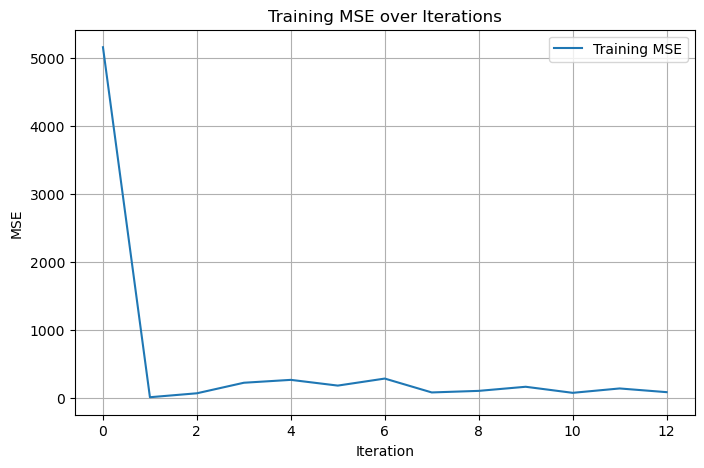

In [93]:
plt.figure(figsize=(8,5))
plt.plot(model1.loss_curve_, label='Training MSE')
plt.title('Training MSE over Iterations')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error

X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_val = x_val.astype('float32')
y_val = y_val.astype('float32')

tf.random.set_seed(42)
np.random.seed(42)

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

history = model.fit(X_train, y_train, epochs=400, batch_size=32, verbose=0)

y_val_pred = model.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)
print("Validation MSE:", mse_val)


1079/1079 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step
Validation MSE: 3.9834816


2024-12-10 02:37:35,937 - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-12-10 02:37:35,938 - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.


KeyError: 'mse'

<Figure size 800x500 with 0 Axes>

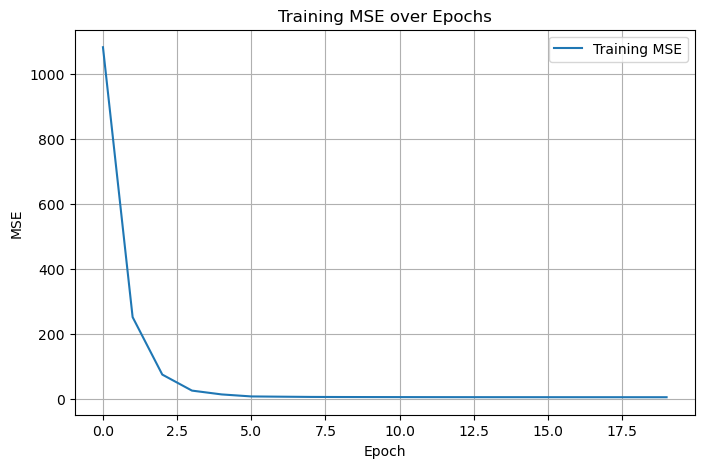

In [86]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'][:20], label='Training MSE')
plt.title('Training MSE over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error

tf.random.set_seed(42)
np.random.seed(42)


def physics_loss_fn(y_pred):
    return tf.reduce_mean(tf.square(y_pred))

alpha = 1

@tf.function
def custom_loss(y_true, y_pred):
    data_loss = tf.reduce_mean(tf.square(y_true - y_pred))
    p_loss = physics_loss_fn(y_pred)
    total_loss = alpha * data_loss + (1 - alpha) * p_loss
    return total_loss

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(loss=custom_loss, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

model.fit(X_train, y_train, epochs=400, batch_size=32, verbose=0)

y_val_pred = model.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)
print("Validation MSE:", mse_val)


1079/1079 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
Validation MSE: 4.0626388


In [53]:
# implement the PINN model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2024-12-09 23:18:13,344 - DEBUG - Falling back to TensorFlow client; we recommended you install the Cloud TPU client directly with pip install cloud-tpu-client.
2024-12-09 23:18:13,695 - DEBUG - Creating converter from 7 to 5
2024-12-09 23:18:13,695 - DEBUG - Creating converter from 5 to 7
2024-12-09 23:18:13,695 - DEBUG - Creating converter from 7 to 5
2024-12-09 23:18:13,696 - DEBUG - Creating converter from 5 to 7


In [66]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_val = x_val.astype('float32')
y_val = y_val.astype('float32')

In [ ]:
input_dim = X_train.shape[1]
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

def data_loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

def physics_loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_pred - y_true))

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
alpha = 1

@tf.function
def train_step(X, y):
    with tf.GradientTape() as tape:
        y_pred = model(X, training=True)
        d_loss = data_loss_fn(y, y_pred)
        p_loss = physics_loss_fn(y_pred, X)
        total_loss = alpha * d_loss + (1 - alpha) * p_loss
    grads = tape.gradient(total_loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    return d_loss, p_loss, total_loss

In [77]:
epochs = 400
batch_size = 32
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size)

for epoch in range(epochs):
    d_losses = []
    p_losses = []
    total_losses = []
    for X_batch, y_batch in train_dataset:
        d_loss, p_loss, tot_loss = train_step(X_batch, y_batch)
        d_losses.append(d_loss.numpy())
        p_losses.append(p_loss.numpy())
        total_losses.append(tot_loss.numpy())
    
    # print(f"Epoch {epoch+1}, "
    #       f"Data Loss: {np.mean(d_losses):.4f}, "
    #       f"Physics Loss: {np.mean(p_losses):.4f}, "
    #       f"Total Loss: {np.mean(total_losses):.4f}")

2024-12-10 01:49:27.530918: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-12-10 01:56:55.733714: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [78]:
y_val_pred = model.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)
print("Validation MSE:", mse_val)

1079/1079 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step
Validation MSE: 111957.59


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_squared_error

X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_val = X_val.astype('float32')
y_val = y_val.astype('float32')


tf.random.set_seed(42)
np.random.seed(42)


input_dim = X_train.shape[1]
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])


def data_loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

def physics_loss_fn(X, y_pred):
    p1 = 0.02   
    Gb = 90.0   
    dt = 90.0   
    G_tm90 = X[:, 19] 
    
    dG_dt = (y_pred - G_tm90) / dt
    residual = dG_dt + p1 * (y_pred - Gb)
    return tf.reduce_mean(tf.square(residual))

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
alpha = 1  

@tf.function
def train_step(X, y):
    with tf.GradientTape() as tape:
        y_pred = model(X, training=True)
        d_loss = data_loss_fn(y, y_pred)
        p_loss = physics_loss_fn(X, y_pred)
        total_loss = alpha * d_loss + (1 - alpha) * p_loss
    grads = tape.gradient(total_loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    return d_loss, p_loss, total_loss


epochs = 100
batch_size = 32
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size)


d_losses_list = []
p_losses_list = []
total_losses_list = []

for epoch in range(epochs):
    d_epoch_losses = []
    p_epoch_losses = []
    total_epoch_losses = []
    for X_batch, y_batch in train_dataset:
        d_loss, p_loss, tot_loss = train_step(X_batch, y_batch)
        d_epoch_losses.append(d_loss.numpy())
        p_epoch_losses.append(p_loss.numpy())
        total_epoch_losses.append(tot_loss.numpy())
    d_mean = np.mean(d_epoch_losses)
    p_mean = np.mean(p_epoch_losses)
    t_mean = np.mean(total_epoch_losses)

    d_losses_list.append(d_mean)
    p_losses_list.append(p_mean)
    total_losses_list.append(t_mean)

    print(f"Epoch {epoch+1}/{epochs}, Data Loss: {d_mean:.4f}, Physics Loss: {p_mean:.4f}, Total Loss: {t_mean:.4f}")


y_val_pred = model.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)
print("Validation MSE:", mse_val)


Epoch 1/100, Data Loss: 67558.7266, Physics Loss: 67.5886, Total Loss: 67558.7266
Epoch 2/100, Data Loss: 515.6880, Physics Loss: 3.2265, Total Loss: 515.6880
Epoch 3/100, Data Loss: 409.8864, Physics Loss: 3.1162, Total Loss: 409.8864
Epoch 4/100, Data Loss: 126.0600, Physics Loss: 2.8396, Total Loss: 126.0600
Epoch 5/100, Data Loss: 88.6057, Physics Loss: 2.7970, Total Loss: 88.6057
Epoch 6/100, Data Loss: 38.7698, Physics Loss: 2.7466, Total Loss: 38.7698
Epoch 7/100, Data Loss: 46.9418, Physics Loss: 2.7564, Total Loss: 46.9418
Epoch 8/100, Data Loss: 14.3317, Physics Loss: 2.7228, Total Loss: 14.3317
Epoch 9/100, Data Loss: 9.5942, Physics Loss: 2.7157, Total Loss: 9.5942
Epoch 10/100, Data Loss: 7.3159, Physics Loss: 2.7051, Total Loss: 7.3159
Epoch 11/100, Data Loss: 6.9690, Physics Loss: 2.7009, Total Loss: 6.9690
Epoch 12/100, Data Loss: 6.8521, Physics Loss: 2.6940, Total Loss: 6.8521
Epoch 13/100, Data Loss: 6.8531, Physics Loss: 2.6940, Total Loss: 6.8531
Epoch 14/100, Data

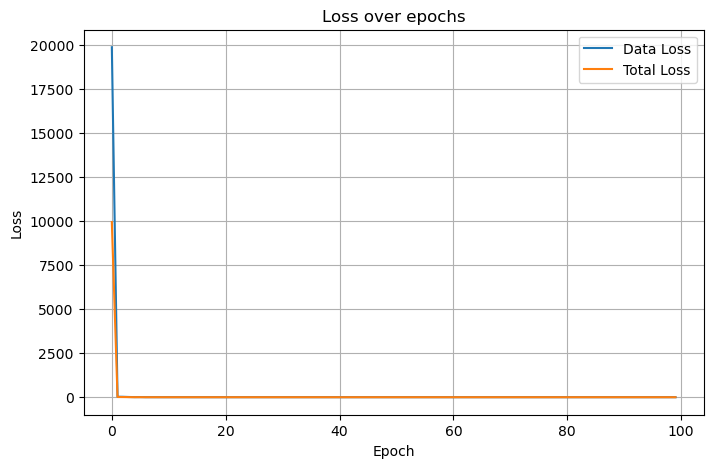

In [97]:
plt.figure(figsize=(8,5))
plt.plot(d_losses_list, label='Data Loss')
plt.plot(total_losses_list, label='Total Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()